In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
energy_data = pd.read_csv('energydata_complete.csv')
energy_data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [3]:
column_names = {'T1': 'Temperature in kitchen area','RH_1': 'Humidity in kitchen area','T2': 'Temperature in living room area',
    'RH_2': 'Humidity in living room area','T3': 'Temperature in laundry room area','RH_3': 'Humidity in laundry room area',
    'T4': 'Temperature in office room','RH_4': 'Humidity in office room','T5': 'Temperature in bathroom',
    'RH_5': 'Humidity in bathroom','T6': 'Temperature outside the building (north side)',
    'RH_6': 'Humidity outside the building (north side)','T7': 'Temperature in ironing room','RH_7': 'Humidity in ironing room',
    'T8': 'Temperature in teenager room 2','RH_8': 'Humidity in teenager room 2','T9': 'Temperature in parents room',
    'RH_9': 'Humidity in parents room','T_out': 'Temperature outside (from Chievres weather station)',
    'RH_out': 'Humidity outside (from Chievres weather station)','rv1': 'Random variable 1','rv2': 'Random variable 2',}

In [4]:
energy_data = energy_data.rename(columns = column_names)
energy_data.head()


,date,Appliances,lights,Temperature in kitchen area,Humidity in kitchen area,Temperature in living room area,Humidity in living room area,Temperature in laundry room area,Humidity in laundry room area,Temperature in office room,...,Temperature in parents room,Humidity in parents room,Temperature outside (from Chievres weather station),Press_mm_hg,Humidity outside (from Chievres weather station),Windspeed,Visibility,Tdewpoint,Random variable 1,Random variable 2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


<AxesSubplot:xlabel='Temperature in living room area', ylabel='Temperature outside the building (north side)'>

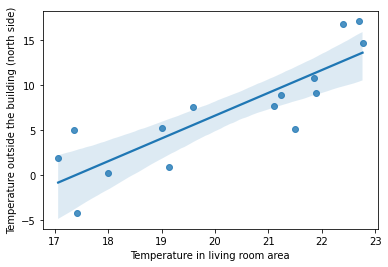

In [5]:
simple_linear_reg_df = energy_data [['Temperature in living room area', 'Temperature outside the building (north side)']].sample(15, random_state=2)
simple_linear_reg_df
#regression plot
sns.regplot(x='Temperature in living room area', y='Temperature outside the building (north side)',
data=simple_linear_reg_df)

In [6]:
energy_data.drop('date', axis=1, inplace=True)
energy_data


,Appliances,lights,Temperature in kitchen area,Humidity in kitchen area,Temperature in living room area,Humidity in living room area,Temperature in laundry room area,Humidity in laundry room area,Temperature in office room,Humidity in office room,...,Temperature in parents room,Humidity in parents room,Temperature outside (from Chievres weather station),Press_mm_hg,Humidity outside (from Chievres weather station),Windspeed,Visibility,Tdewpoint,Random variable 1,Random variable 2
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [7]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_energy_data = pd.DataFrame(scaler.fit_transform(energy_data), columns=energy_data.columns)
features_data = normalised_energy_data[['Temperature in living room area']]
target_variable = normalised_energy_data['Temperature outside the building (north side)']


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_data, target_variable, test_size=0.3, random_state=42)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)


LinearRegression()

In [9]:
y_pred = reg_model.predict(X_test)
y_pred

array([0.23928945, 0.46794238, 0.23108472, ..., 0.3001772 , 0.4297256 ,
       0.3217686 ])

In [10]:
reg_model.coef_.round(2)


array([0.89])

In [11]:
reg_model.intercept_


0.13176427761888432

In [12]:
# r^2
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred)
round(r2_score, 2)

0.64

In [13]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
energy_data.drop(columns = 'lights', axis=1, inplace=True)

scaler = MinMaxScaler()
normd_df = pd.DataFrame(scaler.fit_transform(energy_data), columns = energy_data.columns)


norm_X = normd_df.drop(columns = 'Appliances')
norm_y = normd_df['Appliances']



In [24]:
norm_X

,Temperature in kitchen area,Humidity in kitchen area,Temperature in living room area,Humidity in living room area,Temperature in laundry room area,Humidity in laundry room area,Temperature in office room,Humidity in office room,Temperature in bathroom,Humidity in bathroom,...,Temperature in parents room,Humidity in parents room,Temperature outside (from Chievres weather station),Press_mm_hg,Humidity outside (from Chievres weather station),Windspeed,Visibility,Tdewpoint,Random variable 1,Random variable 2
0,0.327350,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.327350,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.327350,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.327350,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.327350,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0.926786,0.537657,0.711655,0.606309,0.830841,0.579374,0.864865,0.765258,0.752031,0.339590,...,0.864724,0.729443,0.891747,0.602326,0.416667,0.238095,0.348718,0.901961,0.861981,0.861981
19731,0.919747,0.536006,0.701769,0.607836,0.825302,0.582178,0.864865,0.765258,0.754897,0.338487,...,0.864724,0.729443,0.887460,0.602326,0.421053,0.250000,0.361538,0.900452,0.985726,0.985726
19732,0.919747,0.538666,0.692651,0.627198,0.818378,0.603988,0.864865,0.771233,0.754897,0.337585,...,0.864724,0.729443,0.883173,0.602326,0.425439,0.261905,0.374359,0.898944,0.583979,0.583979
19733,0.919747,0.549491,0.677054,0.634717,0.805085,0.585294,0.864865,0.773794,0.752031,0.336583,...,0.864724,0.730581,0.878885,0.602326,0.429825,0.273810,0.387179,0.897436,0.126371,0.126371


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(norm_X, norm_y, test_size=0.3, random_state=42)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = reg_model.predict(X_test)

In [36]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
round(mae, 2) 
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_pred.shape)

0.05

In [37]:
# residual sum of squares
import numpy as np
rss = np.sum(np.square(y_test - y_pred)).round(2)
rss


45.35

In [38]:
reg_model.coef_.round(2)


array([-0.  ,  0.55, -0.24, -0.46,  0.29,  0.1 ,  0.03,  0.03, -0.02,
        0.02,  0.24,  0.04,  0.01, -0.04,  0.1 , -0.16, -0.19, -0.04,
       -0.32,  0.01, -0.08,  0.03,  0.01,  0.12,  0.  ,  0.  ])

In [39]:
reg_model.intercept_

0.15290295882253063

In [40]:
# Root Mean Squared Error
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred)).round(2)
rmse


0.09

In [41]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.5)

In [42]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.001)

In [43]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

reg_model_weights = get_weights_df(reg_model, X_train, 'reg_model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, X_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, X_train, 'Lasso_weight')

final_weights = pd.merge(reg_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights.sort_values(by=['reg_model_Weight','Ridge_Weight', 'Lasso_weight'], ascending=False)

,Features,reg_model_Weight,Ridge_Weight,Lasso_weight
25,Humidity in kitchen area,0.553547,0.511932,0.017880
24,Temperature in laundry room area,0.290627,0.287408,0.000000
23,Temperature outside the building (north side),0.236425,0.213316,0.000000
22,Tdewpoint,0.117758,0.076668,0.000000
21,Temperature in teenager room 2,0.101995,0.100754,0.000000
20,Humidity in laundry room area,0.096048,0.094976,0.000000
19,Humidity outside the building (north side),0.038049,0.035023,-0.000000
18,Windspeed,0.029183,0.030463,0.002912
17,Temperature in office room,0.028981,0.027006,-0.000000
16,Humidity in office room,0.026386,0.024168,0.000000
